# Imports and defining variables

In [30]:
#Imports
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.table import Table, hstack, Column 
import csv
import pandas as pd
import astropy.coordinates as apycoords
#from astropy.coordinates import SkyCoord

In [31]:
#Load combined catalog
path = '/Users/minathoresen/Desktop/JPL_summer_research/CH2O_CMZoom/'
combined_catalog = Table.read(path+'h2co_updated_fits_w_dust.fits') 
print(combined_catalog.keys())

['index', 'area_ellipse', 'area_exact', 'flux_integrated', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'glon', 'glat', 'r_eff', 'flux_integrated_bgsub', 'min_flux_integrated', 'noise', 'peak_cont_flux', 'min_cont_flux', 'mean_cont_flux', 'npix', 'DustTemperature', 'herschel_column', 'mass', 'sma_column', 'r_eff_pc', 'Sigma', 'n', 'rho', 'tff', 'glon_0', 'mass_bgsub', 'suspicious', 'leaf_ID', 'mask_num', 'mass_unc', 'N_unc', 'n_unc', 'rho_unc', 'tff_unc', 'mass_bgsub_unc', 'atoll_final_say', 'SF_final_say', '8um_point_hph', '20-24um_point_hph', '70um_point_hph', 'YSO_hph', 'Walsh+2014_h2o_maser_hph', 'Caswell+2012_methanol_maser_hph', 'Gutermuth+2015_24um_point_hph', 'Molinari+2016_70um_point_hph', 'SF_any_all_hph', 'SF_any_certain_hph', '8um_point_brian', '20-24um_point_brian', '70um_point_brian', 'YSO_brian', 'Walsh+2014_h2o_maser_brian', 'Caswell+2012_methanol_maser_brian', 'Gutermuth+2015_24um_point_brian', 'Molinari+2016_70um_point_brian', 'SF_any_all_brian', 'SF_any_

In [40]:
#Define variables and conditions
T_h2co = combined_catalog['h2co_Tk_0']
T1_h2co = combined_catalog['h2co_Tk_1']
T_1_h2co = combined_catalog['h2co_Tk_-1']
T2_h2co = combined_catalog['h2co_Tk_2']
T_2_h2co= combined_catalog['h2co_Tk_-2']
T3_h2co = combined_catalog['h2co_Tk_3']
T_3_h2co = combined_catalog['h2co_Tk_-3']
N_h2co = combined_catalog['h2co_N_0']
N1_h2co = combined_catalog['h2co_N_1']
N_1_h2co = combined_catalog['h2co_N_-1']
N2_h2co = combined_catalog['h2co_N_2']
N_2_h2co = combined_catalog['h2co_N_-2']
N3_h2co = combined_catalog['h2co_N_3']
N_3_h2co = combined_catalog['h2co_N_-3']
nh2co = combined_catalog['h2co_n_0']
nh2co1 = combined_catalog['h2co_n_1']
nh2co_1 = combined_catalog['h2co_n_-1']
nh2co2 = combined_catalog['h2co_n_2']
nh2co_2 = combined_catalog['h2co_n_-2']
nh2co3 = combined_catalog['h2co_n_3']
nh2co_3 = combined_catalog['h2co_n_-3']
vlsr_h2co = combined_catalog['h2co_vlsr_0']
vlsr1_h2co = combined_catalog['h2co_vlsr_1']
vlsr_1_h2co = combined_catalog['h2co_vlsr_-1']
vlsr2_h2co = combined_catalog['h2co_vlsr_2']
vlsr_2_h2co = combined_catalog['h2co_vlsr_-2']
vlsr3_h2co = combined_catalog['h2co_vlsr_3']
vlsr_3_h2co = combined_catalog['h2co_vlsr_-3']
vlsr_from_new_h2co_fits = combined_catalog['vlsr_from_fit_quality']

Tk_unc_pos1 = T1_h2co-T_h2co
Tk_unc_neg1 = T_h2co-T_1_h2co
N_unc_pos1 = N1_h2co-N_h2co
N_unc_neg1 = N_h2co-N_1_h2co
n_unc_pos1 = nh2co1-nh2co
n_unc_neg1 = nh2co-nh2co_1
vlsr_unc_pos1 = vlsr1_h2co-vlsr_h2co
vlsr_unc_neg1 = vlsr_h2co-vlsr_1_h2co

mass = combined_catalog['mass'] 
mass_unc = combined_catalog['mass_unc']
radius = combined_catalog['r_eff'] #no uncertainties

avg_Tdust = combined_catalog['Avg_dust_temp.']
avg_dust_density = combined_catalog['Avg_dust_density.']
avg_Tdust_unc = combined_catalog['Avg_dust_temp_uncert.']
avg_dust_density_unc = combined_catalog['Avg_dust_density_uncert']
low_Tdust = combined_catalog['Low_dust_temp']
mid_Tdust = combined_catalog['Mid_dust_temp']
high_Tdust = combined_catalog['High_dust_temp']
low_dust_N = combined_catalog['Low_dust_temp_N']
mid_dust_N = combined_catalog['Mid_dust_temp_N']
high_dust_N = combined_catalog['High_dust_temp_N']
low_Tdust_unc = combined_catalog['Low_dust_temp_uncert']
mid_Tdust_unc = combined_catalog['Mid_dust_temp_uncert']
high_Tdust_unc = combined_catalog['High_dust_temp_uncert']
low_dust_N_unc = combined_catalog['Low_dust_temp_N_uncert']
mid_dust_N_unc = combined_catalog['Mid_dust_temp_N_uncert']
high_dust_N_unc = combined_catalog['High_dust_temp_N_uncert']
mass_dust = combined_catalog['Mass_dust']
mass_dust_low = combined_catalog['Mass_dust_low']
mass_dust_mid = combined_catalog['Mass_dust_mid']
mass_dust_high = combined_catalog['Mass_dust_high']
mass_dust_unc = combined_catalog['Mass_dust_uncert']
chi_sq_dust = combined_catalog['Chi_square_dust']

gas_dust_T_diff_avg = T_h2co-avg_Tdust
gas_dust_T_diff_low = T_h2co-low_Tdust
gas_dust_T_diff_mid = T_h2co-mid_Tdust
gas_dust_T_diff_high = T_h2co-high_Tdust

multi_component = (combined_catalog['multi_component_flag']==1)
not_multi_component = (combined_catalog['multi_component_flag']==0)

h2co_detection = (combined_catalog['detection_flag']==1)
h2co_nondetection = (combined_catalog['detection_flag']==0)

starforming_condition1 = (combined_catalog['SF_final_say'] == 1)
starforming_condition0 = (combined_catalog['SF_final_say'] == 0)
starforming_condition2 = (combined_catalog['SF_final_say'] == 2)

h2co_mask = (combined_catalog['h2co_Tk_0'] != -1)
dust_mask = (combined_catalog['Avg_dust_temp.'] != -1) 
mid_dust_mask = (combined_catalog['Mid_dust_temp']!=0) & (combined_catalog['Mid_dust_temp']!=-1)

glat = combined_catalog['glat']
glon = combined_catalog['glon']

leaf_ID = combined_catalog['leaf_ID']

in_CMZ = (combined_catalog['mask_num']!=27) & (combined_catalog['mask_num']!=13) & (combined_catalog['mask_num']!=17) & (combined_catalog['mask_num']!=33)
out = (combined_catalog['leaf_ID'][:-1] == 'G0.316-0.201')



In [41]:
print(np.sum(combined_catalog['Low_dust_temp']!=-1))
print(np.sum(combined_catalog['Mid_dust_temp']!=-1))
print(np.sum(combined_catalog['High_dust_temp']!=-1))
print(np.sum(combined_catalog['Avg_dust_temp.']!=-1))

print(np.sum(combined_catalog['Low_dust_temp']!=0))
print(np.sum(combined_catalog['Mid_dust_temp']!=0))
print(np.sum(combined_catalog['High_dust_temp']!=0))
print(np.sum(combined_catalog['Avg_dust_temp.']!=0))
# for i, j in enumerate(combined_catalog['Mid_dust_temp']):
#     print(j)

177
177
177
177
285
173
285
285


# Population Studies

## Gas vs Dust Temps

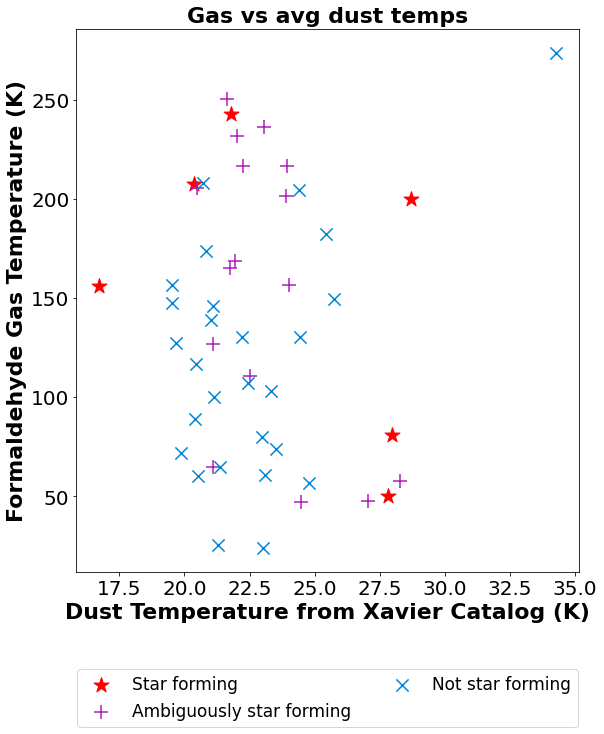

In [42]:
#gas vs avg dust temp
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(avg_Tdust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='red', marker='*', label='Star forming', s=250)
ax.scatter(avg_Tdust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='xkcd:barney', marker='+', label='Ambiguously star forming', s=210)
ax.scatter(avg_Tdust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='xkcd:cerulean', marker='x', label='Not star forming', s=150)

# ax.errorbar(Tdust[starforming_condition1&specific_condition3&h2co_mask], Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], c='red', ls='none')
# ax.errorbar(Tdust[starforming_condition2&specific_condition3&h2co_mask], Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], c='mediumorchid', ls='none')
# ax.errorbar(Tdust[starforming_condition0&specific_condition3&h2co_mask], Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], c='royalblue', ls='none')

# plt.xlim(1, 35)
# plt.ylim(3, 300)
plt.xlabel('Dust Temperature from Xavier Catalog (K)', fontsize = 22, weight='bold')
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22, weight='bold')
plt.title('Gas vs avg dust temps', fontsize = 22, weight='bold')

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)


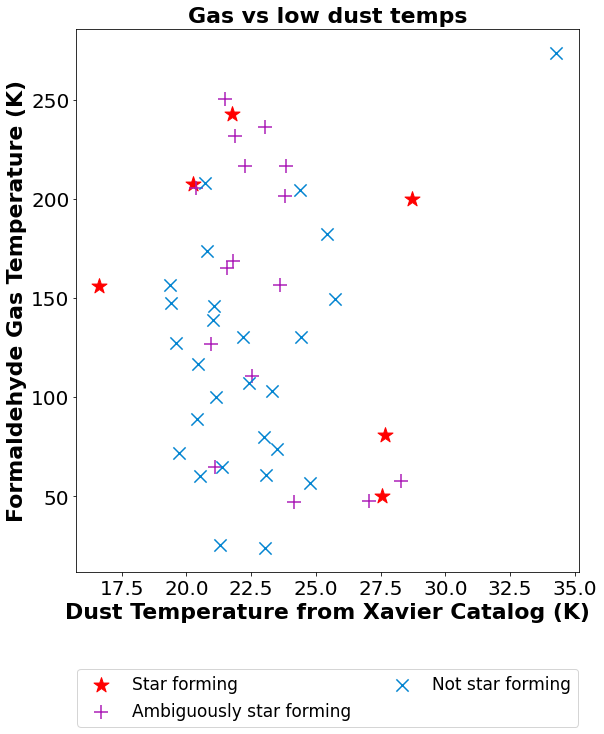

In [43]:
#gas vs low dust temp
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(low_Tdust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='red', marker='*', label='Star forming', s=250)
ax.scatter(low_Tdust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='xkcd:barney', marker='+', label='Ambiguously star forming', s=210)
ax.scatter(low_Tdust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='xkcd:cerulean', marker='x', label='Not star forming', s=150)

# ax.errorbar(Tdust[starforming_condition1&specific_condition3&h2co_mask], Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], c='red', ls='none')
# ax.errorbar(Tdust[starforming_condition2&specific_condition3&h2co_mask], Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], c='mediumorchid', ls='none')
# ax.errorbar(Tdust[starforming_condition0&specific_condition3&h2co_mask], Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], c='royalblue', ls='none')

# plt.xlim(1, 35)
# plt.ylim(3, 300)
plt.xlabel('Dust Temperature from Xavier Catalog (K)', fontsize = 22, weight='bold')
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22, weight='bold')
plt.title('Gas vs low dust temps', fontsize = 22, weight='bold')

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)



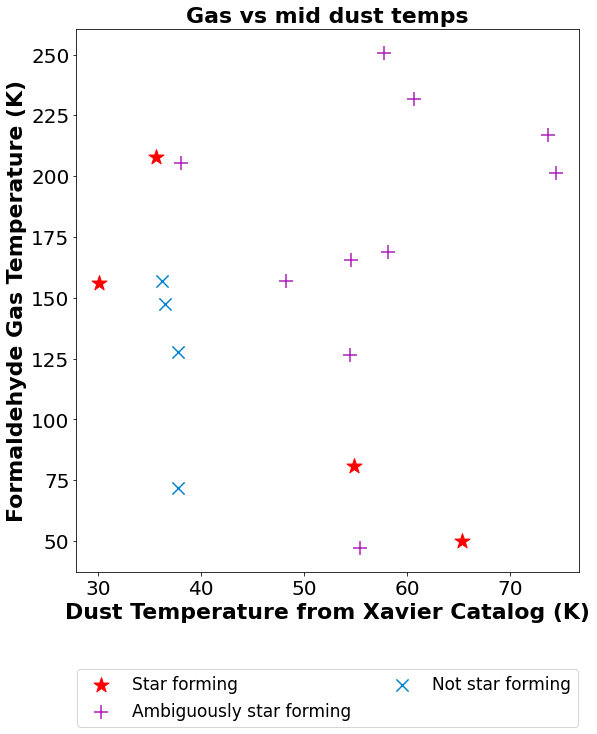

In [46]:
#gas vs mid dust temp
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(mid_Tdust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], c='red', marker='*', label='Star forming', s=250)
ax.scatter(mid_Tdust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], c='xkcd:barney', marker='+', label='Ambiguously star forming', s=210)
ax.scatter(mid_Tdust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], c='xkcd:cerulean', marker='x', label='Not star forming', s=150)

# ax.errorbar(Tdust[starforming_condition1&specific_condition3&h2co_mask], Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], c='red', ls='none')
# ax.errorbar(Tdust[starforming_condition2&specific_condition3&h2co_mask], Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], c='mediumorchid', ls='none')
# ax.errorbar(Tdust[starforming_condition0&specific_condition3&h2co_mask], Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], c='royalblue', ls='none')

# plt.xlim(1, 35)
# plt.ylim(3, 300)
plt.xlabel('Dust Temperature from Xavier Catalog (K)', fontsize = 22, weight='bold')
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22, weight='bold')
plt.title('Gas vs mid dust temps', fontsize = 22, weight='bold')
# plt.xscale('log')


ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)



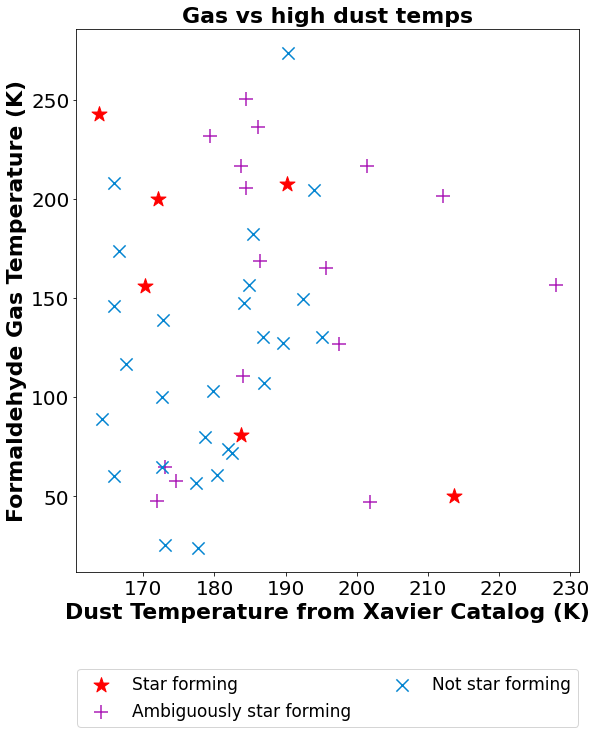

In [48]:
#gas vs high dust temp
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(high_Tdust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='red', marker='*', label='Star forming', s=250)
ax.scatter(high_Tdust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='xkcd:barney', marker='+', label='Ambiguously star forming', s=210)
ax.scatter(high_Tdust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], c='xkcd:cerulean', marker='x', label='Not star forming', s=150)

# ax.errorbar(Tdust[starforming_condition1&specific_condition3&h2co_mask], Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], c='red', ls='none')
# ax.errorbar(Tdust[starforming_condition2&specific_condition3&h2co_mask], Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], c='mediumorchid', ls='none')
# ax.errorbar(Tdust[starforming_condition0&specific_condition3&h2co_mask], Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], c='royalblue', ls='none')

# plt.xlim(170, 250)
# plt.ylim(170, 250)
plt.xlabel('Dust Temperature from Xavier Catalog (K)', fontsize = 22, weight='bold')
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22, weight='bold')
plt.title('Gas vs high dust temps', fontsize = 22, weight='bold')

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 2, fontsize=17)


## Gas temp vs dust mass

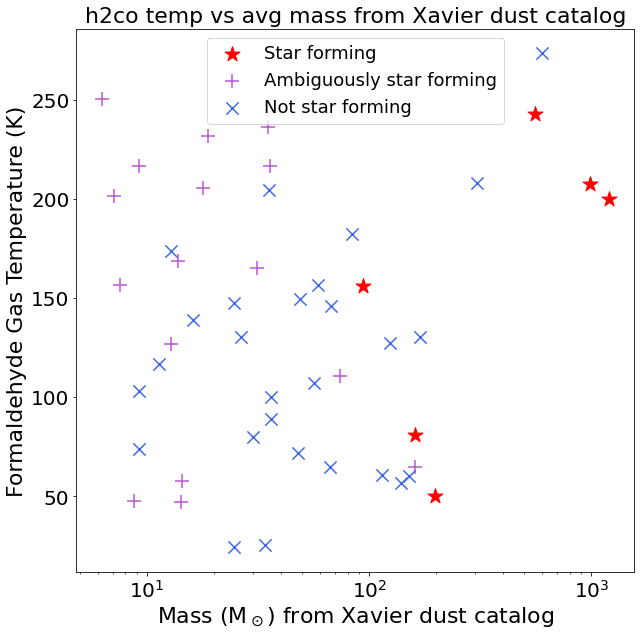

In [49]:
#gas temp vs avg mass from dust catalog
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(mass_dust[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=250, c='red', marker='*', label='Star forming')
ax.scatter(mass_dust[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=210, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(mass_dust[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=150, c='royalblue', marker='x', label='Not star forming')

# ax.errorbar(np.log10(mass[starforming_condition1&specific_condition3&h2co_mask]), Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition1&specific_condition3&h2co_mask])], c='red', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition2&specific_condition3&h2co_mask]), Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition2&specific_condition3&h2co_mask])], c='mediumorchid', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition0&specific_condition3&h2co_mask]), Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition0&specific_condition3&h2co_mask])], c='royalblue', ls='none')

# plt.ylim(3, 300)
# plt.xlim(0, 1210)
plt.xlabel('Mass (M$_\odot$) from Xavier dust catalog', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.title('h2co temp vs avg mass from Xavier dust catalog', fontsize = 22)
plt.xscale('log')

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)
#dont use these uncertainties for mass 
#make gluevis plot on cmz color coded by temp 


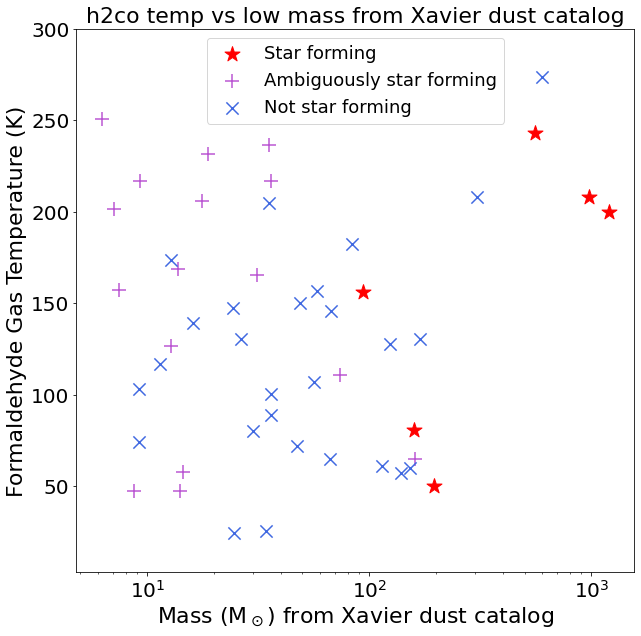

In [50]:
#gas temp vs low mass from dust catalog
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(mass_dust_low[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=250, c='red', marker='*', label='Star forming')
ax.scatter(mass_dust_low[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=210, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(mass_dust_low[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=150, c='royalblue', marker='x', label='Not star forming')
plt.xscale('log')

# ax.errorbar(np.log10(mass[starforming_condition1&specific_condition3&h2co_mask]), Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition1&specific_condition3&h2co_mask])], c='red', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition2&specific_condition3&h2co_mask]), Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition2&specific_condition3&h2co_mask])], c='mediumorchid', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition0&specific_condition3&h2co_mask]), Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition0&specific_condition3&h2co_mask])], c='royalblue', ls='none')

plt.ylim(3, 300)
plt.xlabel('Mass (M$_\odot$) from Xavier dust catalog', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.title('h2co temp vs low mass from Xavier dust catalog', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)
#dont use these uncertainties for mass 
#make gluevis plot on cmz color coded by temp 

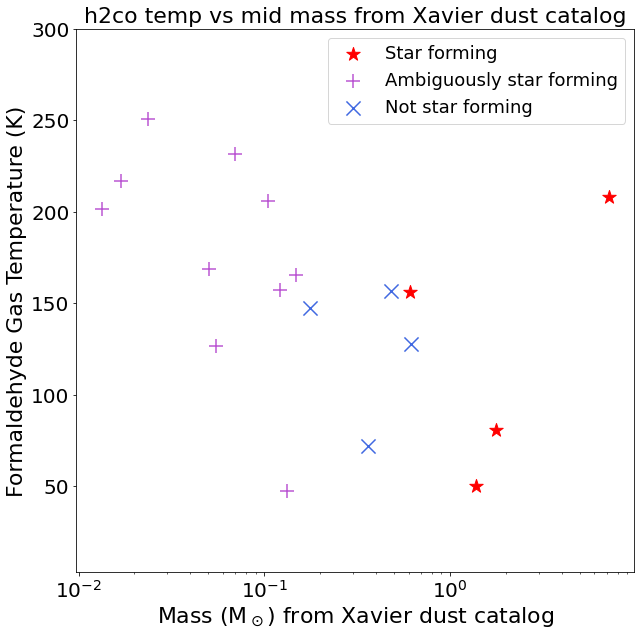

In [51]:
#gas temp vs mid mass from dust catalog
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(mass_dust_mid[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], s=200, c='red', marker='*', label='Star forming')
ax.scatter(mass_dust_mid[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(mass_dust_mid[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], s=200, c='royalblue', marker='x', label='Not star forming')

# ax.errorbar(np.log10(mass[starforming_condition1&specific_condition3&h2co_mask]), Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition1&specific_condition3&h2co_mask])], c='red', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition2&specific_condition3&h2co_mask]), Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition2&specific_condition3&h2co_mask])], c='mediumorchid', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition0&specific_condition3&h2co_mask]), Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition0&specific_condition3&h2co_mask])], c='royalblue', ls='none')

plt.ylim(3, 300)
plt.xlabel('Mass (M$_\odot$) from Xavier dust catalog', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.title('h2co temp vs mid mass from Xavier dust catalog', fontsize = 22)
plt.xscale('log')


ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)
#dont use these uncertainties for mass 
#make gluevis plot on cmz color coded by temp 

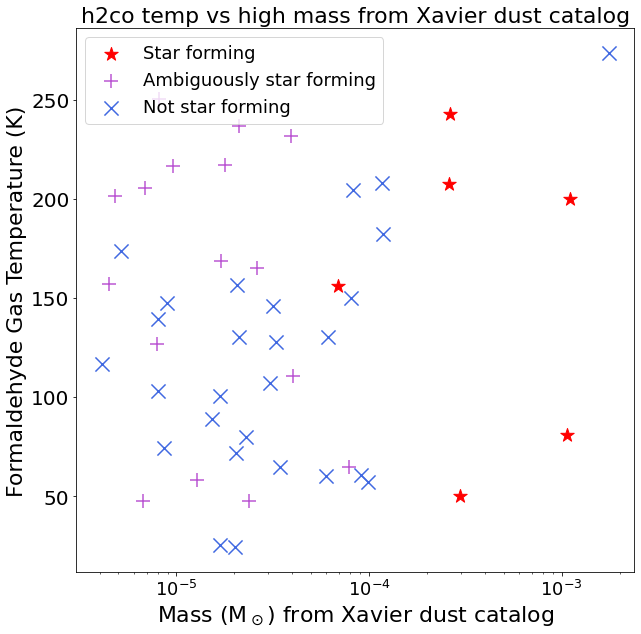

In [52]:
#gas temp vs high mass from dust catalog
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(mass_dust_high[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='red', marker='*', label='Star forming')
ax.scatter(mass_dust_high[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(mass_dust_high[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], T_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='royalblue', marker='x', label='Not star forming')

# ax.errorbar(np.log10(mass[starforming_condition1&specific_condition3&h2co_mask]), Tk[starforming_condition1&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition1&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition1&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition1&specific_condition3&h2co_mask])], c='red', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition2&specific_condition3&h2co_mask]), Tk[starforming_condition2&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition2&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition2&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition2&specific_condition3&h2co_mask])], c='mediumorchid', ls='none')
# ax.errorbar(np.log10(mass[starforming_condition0&specific_condition3&h2co_mask]), Tk[starforming_condition0&specific_condition3&h2co_mask],  yerr =[Tk_unc_neg[starforming_condition0&specific_condition3&h2co_mask], Tk_unc_pos[starforming_condition0&specific_condition3&h2co_mask]], xerr = [np.log10(mass_unc[starforming_condition0&specific_condition3&h2co_mask])], c='royalblue', ls='none')

# plt.ylim(3, 300)
plt.xlabel('Mass (M$_\odot$) from Xavier dust catalog', fontsize = 22)
plt.ylabel('Formaldehyde Gas Temperature (K)', fontsize = 22)
plt.xscale('log')
plt.title('h2co temp vs high mass from Xavier dust catalog', fontsize = 22)

ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)
#dont use these uncertainties for mass 
#make gluevis plot on cmz color coded by temp 

## Difference between gas and dust temps

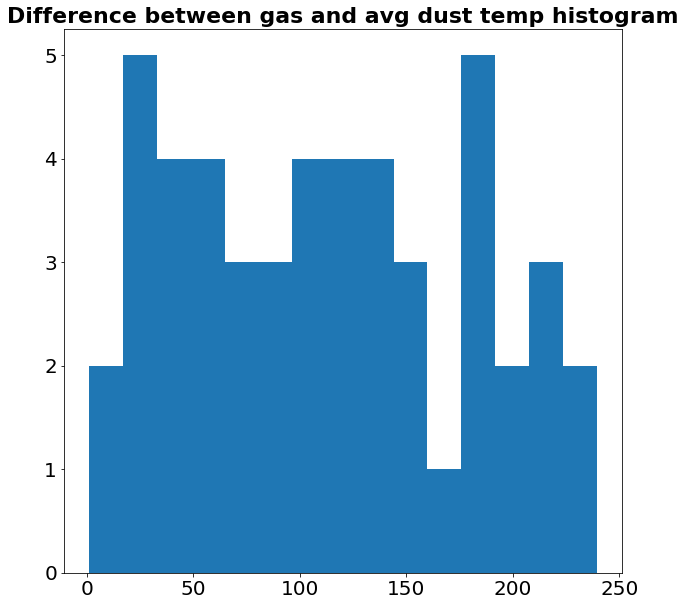

In [53]:
#Diff between gas and avg dust temp histogram
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.hist(gas_dust_T_diff_avg[not_multi_component & h2co_detection & in_CMZ & dust_mask], bins=15)
plt.title('Difference between gas and avg dust temp histogram', fontsize = 22, weight='bold')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

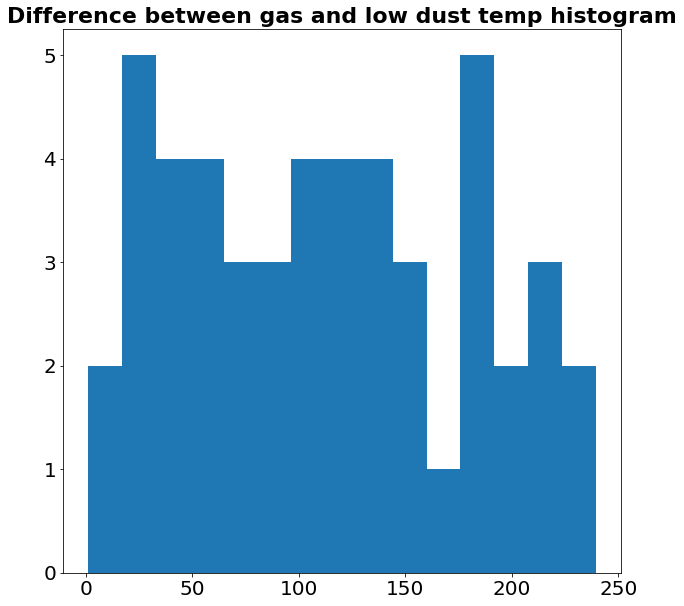

In [54]:
#Diff between gas and low dust temp histogram
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.hist(gas_dust_T_diff_low[not_multi_component & h2co_detection & in_CMZ & dust_mask], bins=15)
plt.title('Difference between gas and low dust temp histogram', fontsize = 22, weight='bold')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

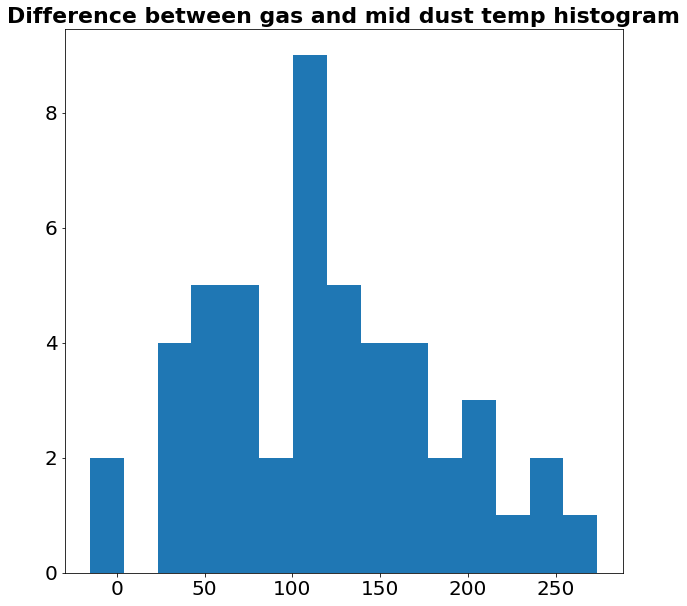

In [55]:
#Diff between gas and mid dust temp histogram
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.hist(gas_dust_T_diff_mid[not_multi_component & h2co_detection & in_CMZ & dust_mask], bins=15)
plt.title('Difference between gas and mid dust temp histogram', fontsize = 22, weight='bold')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

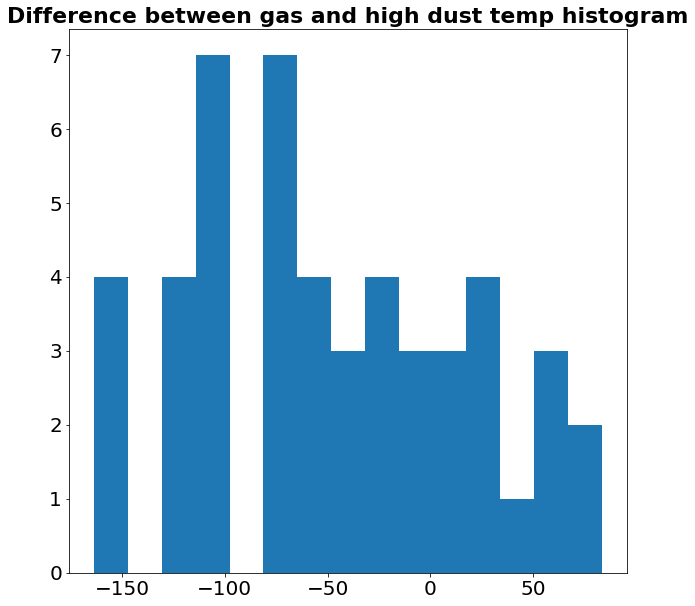

In [56]:
#Diff between gas and high dust temp histogram
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))
ax.hist(gas_dust_T_diff_high[not_multi_component & h2co_detection & in_CMZ & dust_mask], bins=15)
plt.title('Difference between gas and high dust temp histogram', fontsize = 22, weight='bold')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

## Densities

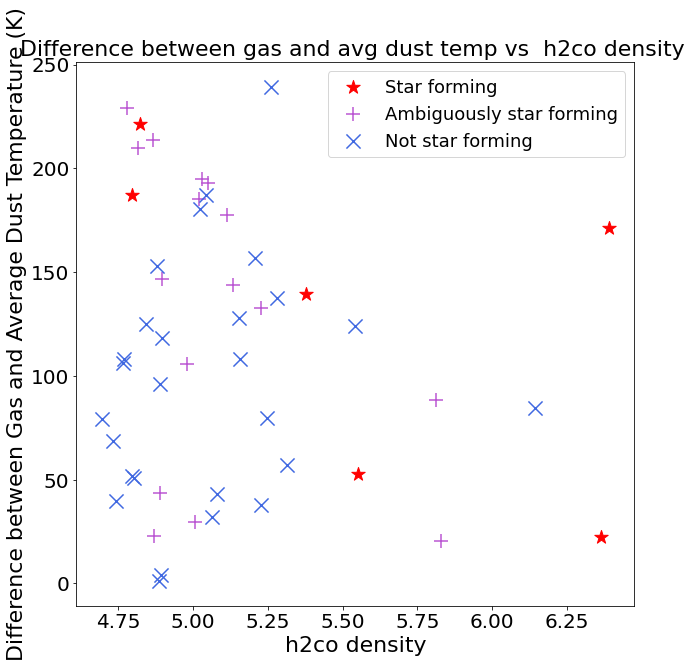

In [57]:
#Diff between gas and avg dust temp vs density 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(nh2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_avg[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='red', marker='*', label='Star forming')
ax.scatter(nh2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_avg[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(nh2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_avg[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('h2co density', fontsize = 22)
plt.ylabel('Difference between Gas and Average Dust Temperature (K)', fontsize = 22)
plt.title('Difference between gas and avg dust temp vs  h2co density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)


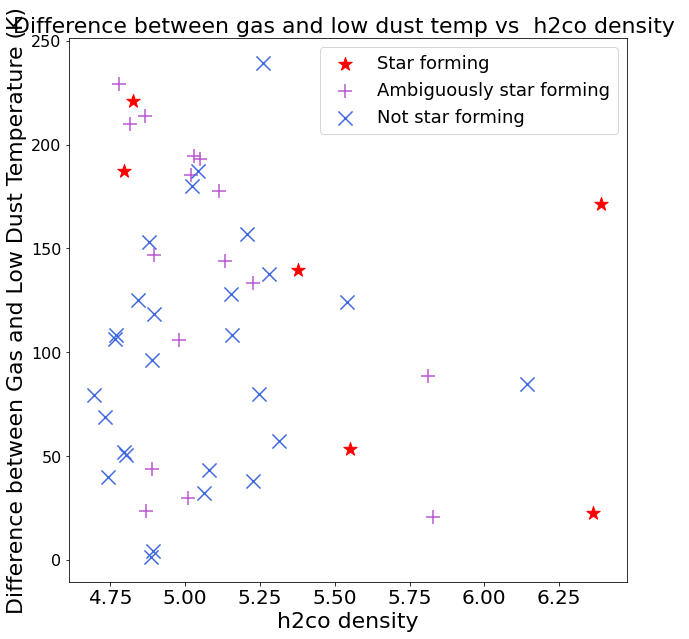

In [58]:
#Diff between gas and low dust temp vs density 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(nh2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_low[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='red', marker='*', label='Star forming')
ax.scatter(nh2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_low[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(nh2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_low[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('h2co density', fontsize = 22)
plt.ylabel('Difference between Gas and Low Dust Temperature (K)', fontsize = 22)
plt.title('Difference between gas and low dust temp vs  h2co density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=16)
ax.legend(loc='best', fontsize=18)



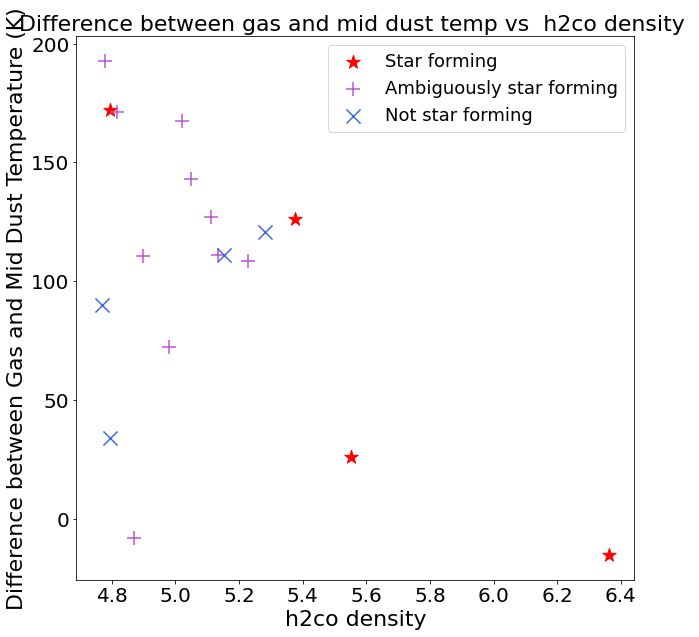

In [62]:
#Diff between gas and mid dust temp vs density 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(nh2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], gas_dust_T_diff_mid[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], s=200, c='red', marker='*', label='Star forming')
ax.scatter(nh2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], gas_dust_T_diff_mid[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(nh2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], gas_dust_T_diff_mid[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('h2co density', fontsize = 22)
plt.ylabel('Difference between Gas and Mid Dust Temperature (K)', fontsize = 22)
plt.title('Difference between gas and mid dust temp vs  h2co density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)


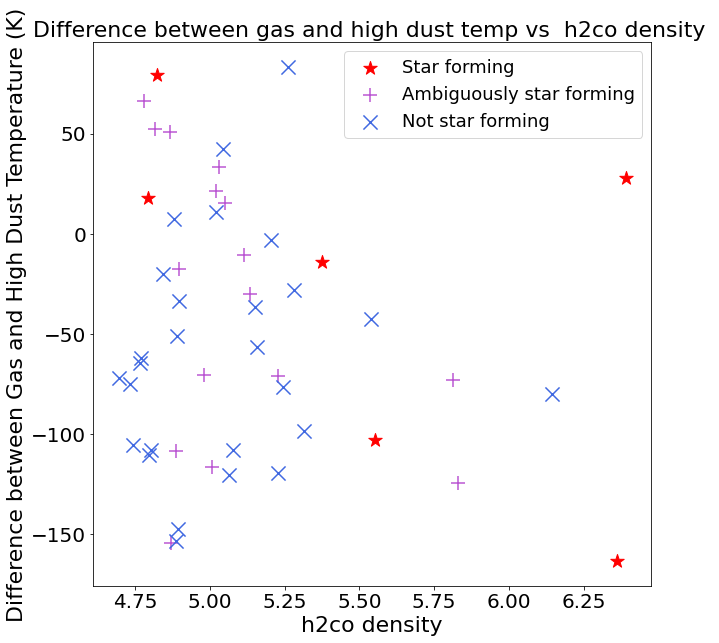

In [60]:
#Diff between gas and high dust temp vs density 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(nh2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_high[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='red', marker='*', label='Star forming')
ax.scatter(nh2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_high[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(nh2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], gas_dust_T_diff_high[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('h2co density', fontsize = 22)
plt.ylabel('Difference between Gas and High Dust Temperature (K)', fontsize = 22)
plt.title('Difference between gas and high dust temp vs  h2co density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)



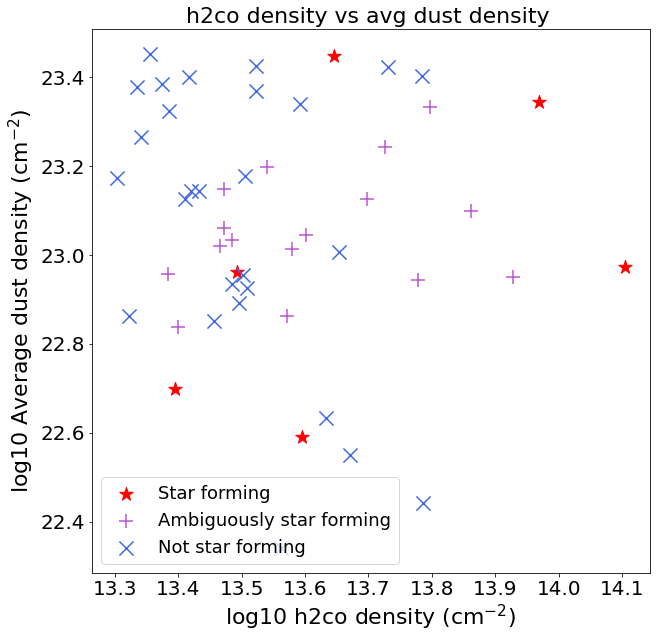

In [61]:
#h2co density vs avg dust density
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(N_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(avg_dust_density[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='red', marker='*', label='Star forming')
ax.scatter(N_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(avg_dust_density[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(N_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(avg_dust_density[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('log10 h2co density (cm$^{-2}$)', fontsize = 22)
plt.ylabel('log10 Average dust density (cm$^{-2}$)', fontsize = 22)
plt.title('h2co density vs avg dust density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)


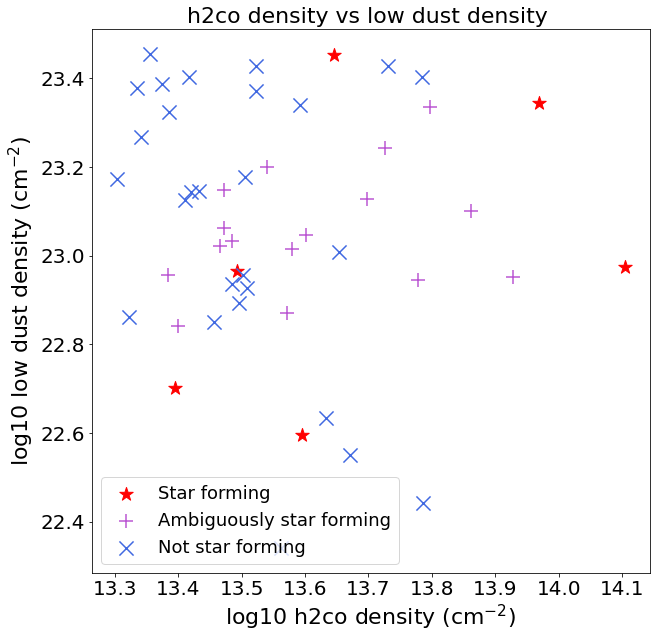

In [63]:
#h2co density vs low dust density
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(N_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(low_dust_N[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200,  c='red', marker='*', label='Star forming')
ax.scatter(N_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(low_dust_N[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(N_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(low_dust_N[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('log10 h2co density (cm$^{-2}$)', fontsize = 22)
plt.ylabel('log10 low dust density (cm$^{-2}$)', fontsize = 22)
plt.title('h2co density vs low dust density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)



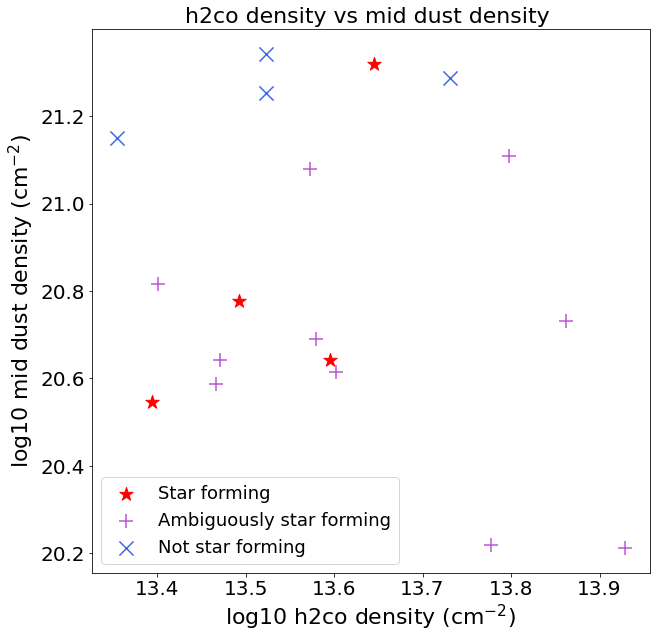

In [64]:
#h2co density vs mid dust density
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(N_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], np.log10(mid_dust_N[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask]), s=200, c='red', marker='*', label='Star forming')
ax.scatter(N_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], np.log10(mid_dust_N[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask]), s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(N_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask], np.log10(mid_dust_N[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask & mid_dust_mask]), s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('log10 h2co density (cm$^{-2}$)', fontsize = 22)
plt.ylabel('log10 mid dust density (cm$^{-2}$)', fontsize = 22)
plt.title('h2co density vs mid dust density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)



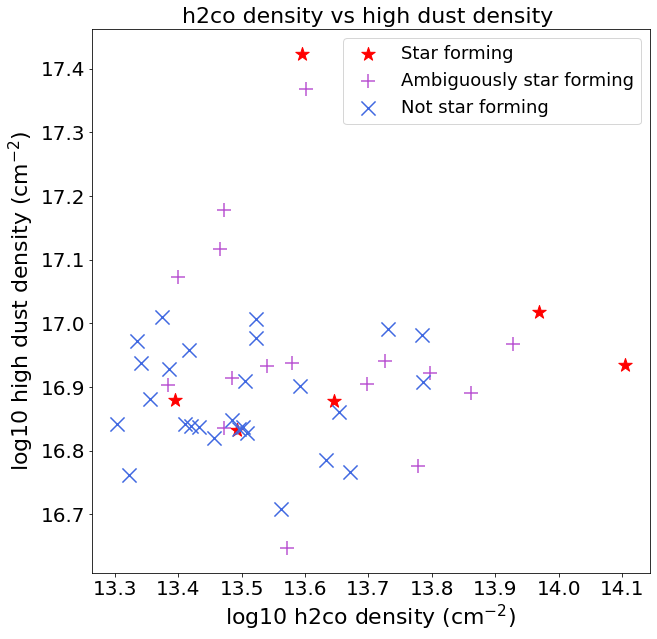

In [65]:
#h2co density vs high dust density
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(N_h2co[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(high_dust_N[starforming_condition1 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='red', marker='*', label='Star forming')
ax.scatter(N_h2co[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(high_dust_N[starforming_condition2 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='mediumorchid', marker='+', label='Ambiguously star forming')
ax.scatter(N_h2co[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask], np.log10(high_dust_N[starforming_condition0 & not_multi_component & h2co_detection & in_CMZ & dust_mask]), s=200, c='royalblue', marker='x', label='Not star forming')

# plt.ylim(0, 250)
plt.xlabel('log10 h2co density (cm$^{-2}$)', fontsize = 22)
plt.ylabel('log10 high dust density (cm$^{-2}$)', fontsize = 22)
plt.title('h2co density vs high dust density ', fontsize = 22)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.legend(loc='best', fontsize=18)



# Case Studies

## Dust ridge cloud c

In [61]:
#using astropy to calculate coordinates in cartesian- 1st 2 points! #dustridge c
Glon1 = -0.3760651010894094*u.deg
Glat1 = -0.24710558434732224*u.deg

Glon2 = -0.3853654338704473*u.deg
Glat2 = -0.24323223654332535*u.deg

# Glon = glon
# Glat = glat

distance= 1.2*u.kpc
c1= apycoords.SkyCoord(Glon1,Glat1,distance=distance,frame='galactic')
c2= apycoords.SkyCoord(Glon2,Glat2,distance=distance,frame='galactic')
c3= apycoords.SkyCoord(glon,glat,distance=distance,frame='galactic')

gc_frame= apycoords.Galactocentric(galcen_distance=8.2*u.kpc,
                                   z_sun=25.*u.pc)
gc = c3.transform_to(gc_frame)
gc.representation_type = 'cartesian'
# print("(x,y,z) in (kpc,kpc,kpc) in right-handed frame")
# print("\t",gc.cartesian) 

# dustridgec_ = (leaf_ID=='G0.380+0.050a' or leaf_ID=='G0.380+0.050b' or leaf_ID=='G0.380+0.050c' or 
# leaf_ID=='G0.380+0.050d' or leaf_ID=='G0.380+0.050e' or leaf_ID=='G0.380+0.050f' or
# leaf_ID=='G0.380+0.050g' or leaf_ID=='G0.380+0.050h')

dustridgec = (combined_catalog['leaf_ID'][:-1] == 'G0.380+0.050')

#define specific conditions
dustridgec_a = (leaf_ID=='G0.380+0.050a')
dustridgec_b = (leaf_ID=='G0.380+0.050b')
dustridgec_c = (leaf_ID=='G0.380+0.050c')
dustridgec_d = (leaf_ID=='G0.380+0.050d')
dustridgec_e = (leaf_ID=='G0.380+0.050e')
dustridgec_f = (leaf_ID=='G0.380+0.050f')
dustridgec_g = (leaf_ID=='G0.380+0.050g')
dustridgec_h = (leaf_ID=='G0.380+0.050h')

# dustridgec = ('G0.380+0.05' in leaf_ID)

# for i in leaf_ID:
#     if 'G0.380+0.05' in i:
#         print(i)
        
#distance
c1.separation_3d(c2) 
#look at dust ridge cloud c G0.380+0.05
# https://galaxiesbook.org/chapters/A.-Coordinate-systems.html

<Distance 0.000211 kpc>

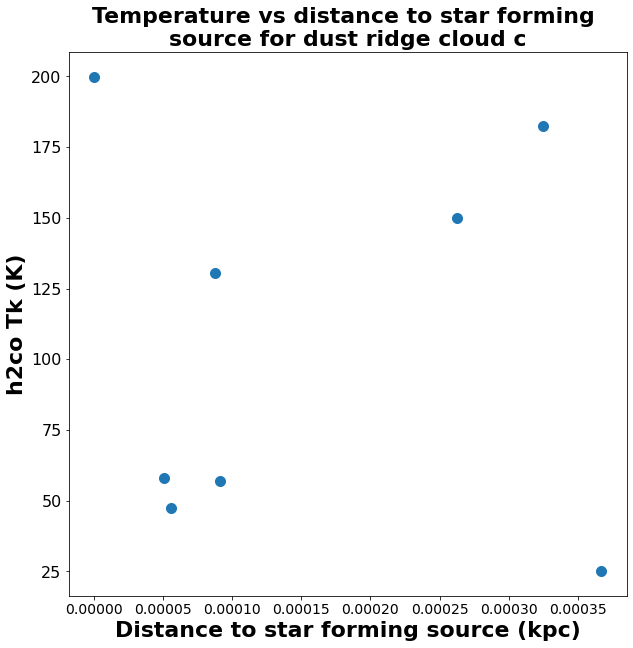

In [62]:
#find star forming status for each source #dustridge c
# print(combined_catalog['SF_final_say'][dustridgec_a])
# print(combined_catalog['SF_final_say'][dustridgec_b])
# print(combined_catalog['SF_final_say'][dustridgec_c])
# print(combined_catalog['SF_final_say'][dustridgec_d])
# print(combined_catalog['SF_final_say'][dustridgec_e])
# print(combined_catalog['SF_final_say'][dustridgec_f])
# print(combined_catalog['SF_final_say'][dustridgec_g])
# print(combined_catalog['SF_final_say'][dustridgec_h])

#calculate distances to star forming source (source a)
ca = apycoords.SkyCoord(glon[dustridgec_a],glat[dustridgec_a],distance=distance,frame='galactic')
cb = apycoords.SkyCoord(glon[dustridgec_b],glat[dustridgec_b],distance=distance,frame='galactic')
cc = apycoords.SkyCoord(glon[dustridgec_c],glat[dustridgec_c],distance=distance,frame='galactic')
cd = apycoords.SkyCoord(glon[dustridgec_d],glat[dustridgec_d],distance=distance,frame='galactic')
ce = apycoords.SkyCoord(glon[dustridgec_e],glat[dustridgec_e],distance=distance,frame='galactic')
cf = apycoords.SkyCoord(glon[dustridgec_f],glat[dustridgec_f],distance=distance,frame='galactic')
cg = apycoords.SkyCoord(glon[dustridgec_g],glat[dustridgec_g],distance=distance,frame='galactic')
ch = apycoords.SkyCoord(glon[dustridgec_h],glat[dustridgec_h],distance=distance,frame='galactic')


gc_frame= apycoords.Galactocentric(galcen_distance=8.2*u.kpc,
                                   z_sun=25.*u.pc)
gc.representation_type = 'cartesian'


#print distances to star forming source
# print(ca.separation_3d(ca)) 
# print(ca.separation_3d(cb)) 
# print(ca.separation_3d(cc))
# print(ca.separation_3d(cd))
# print(ca.separation_3d(ce))
# print(ca.separation_3d(cf))
# print(ca.separation_3d(cg))
# print(ca.separation_3d(ch))

# #print formaldehyde temps
# print(T_h2co[dustridgec_a])
# print(T_h2co[dustridgec_b])
# print(T_h2co[dustridgec_c])
# print(T_h2co[dustridgec_d])
# print(T_h2co[dustridgec_e])
# print(T_h2co[dustridgec_f])
# print(T_h2co[dustridgec_g])
# print(T_h2co[dustridgec_h])

dustridgec_dist = [ca.separation_3d(ca), ca.separation_3d(cb), ca.separation_3d(cc), ca.separation_3d(cd), ca.separation_3d(ce), ca.separation_3d(cf), ca.separation_3d(cg), ca.separation_3d(ch)]
dustridgec_gastemp = [T_h2co[dustridgec_a], T_h2co[dustridgec_b], T_h2co[dustridgec_c], T_h2co[dustridgec_d], T_h2co[dustridgec_e], T_h2co[dustridgec_f],T_h2co[dustridgec_g], T_h2co[dustridgec_h]]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist, dustridgec_gastemp, s=100)
plt.xlabel('Distance to star forming source (kpc)', fontsize = 22, weight='bold')
plt.ylabel('h2co Tk (K)', fontsize = 22, weight='bold')
plt.title('Temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=16)


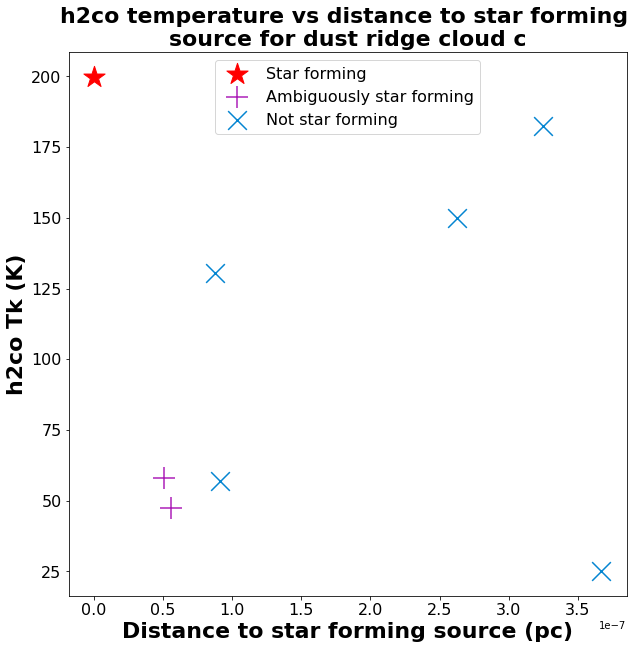

In [63]:
#dust ridge cloud c gas temp poster plot
#print distances to star forming source
# print(ca.separation_3d(ca), ca.separation_3d(cb), ca.separation_3d(cc), ca.separation_3d(cd),ca.separation_3d(ce), ca.separation_3d(cf), ca.separation_3d(cg), ca.separation_3d(ch))

#print formaldehyde temps
# print(Tk[dustridgec_a], Tk[dustridgec_b], Tk[dustridgec_c], Tk[dustridgec_d], Tk[dustridgec_e], Tk[dustridgec_f], Tk[dustridgec_g], Tk[dustridgec_h])

dustridgec_dist1 = [ca.separation_3d(ca)/1000]
dustridgec_gastemp1 = [T_h2co[dustridgec_a]]
# dustridgec_gastemp_unc_pos1 = [Tk_unc_pos[dustridgec_a]]
# dustridgec_gastemp_unc_neg1 = [Tk_unc_neg[dustridgec_a]]

dustridgec_dist0 = [ca.separation_3d(cb)/1000, ca.separation_3d(cc)/1000, ca.separation_3d(cd)/1000,
                   ca.separation_3d(ce)/1000, ca.separation_3d(cf)/1000]
dustridgec_gastemp0 = [T_h2co[dustridgec_b], T_h2co[dustridgec_c], T_h2co[dustridgec_d], T_h2co[dustridgec_e], T_h2co[dustridgec_f]]
# dustridgec_gastemp_unc_pos0 = [Tk_unc_pos[dustridgec_b], Tk_unc_pos[dustridgec_c], Tk_unc_pos[dustridgec_d], Tk_unc_pos[dustridgec_e], Tk_unc_pos[dustridgec_f]]
# dustridgec_gastemp_unc_neg0 = [Tk_unc_neg[dustridgec_b], Tk_unc_neg[dustridgec_c], Tk_unc_neg[dustridgec_d], Tk_unc_neg[dustridgec_e], Tk_unc_neg[dustridgec_f]]

dustridgec_dist2 = [ca.separation_3d(cg)/1000, ca.separation_3d(ch)/1000]
dustridgec_gastemp2 = [T_h2co[dustridgec_g], T_h2co[dustridgec_h]]
# dustridgec_gastemp_unc_pos2 = [Tk_unc_pos[dustridgec_g],Tk_unc_pos[dustridgec_h]]
# dustridgec_gastemp_unc_neg2 = [Tk_unc_neg[dustridgec_g],Tk_unc_neg[dustridgec_h]]
                       
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_dist2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_dist0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

#ERROR BARS NOT WORKING
# ax.errorbar(dustridgec_dist1, dustridgec_gastemp1, yerr =[dustridgec_gastemp_unc_neg1, dustridgec_gastemp_unc_pos1], c='red', ls='none')
# ax.errorbar(dustridgec_dist2, dustridgec_gastemp2, yerr =[dustridgec_gastemp_unc_neg2, dustridgec_gastemp_unc_pos2], c='xkcd:barney', ls='none')
# ax.errorbar(dustridgec_dist0, dustridgec_gastemp0, yerr =[dustridgec_gastemp_unc_neg0, dustridgec_gastemp_unc_pos0], c='xckd:cerulean', ls='none')

# ax.errorbar(nh2co[specific_condition1], np.log10(ncatalog[specific_condition1]),  yerr =[ncatalog_unc[specific_condition1]], xerr = [nh2co_unc_neg[specific_condition1], nh2co_unc_pos[specific_condition1]], c='orange', ls='none')


plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
plt.ylabel('h2co Tk (K)', fontsize = 22, weight='bold')
plt.title('h2co temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='upper center')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)



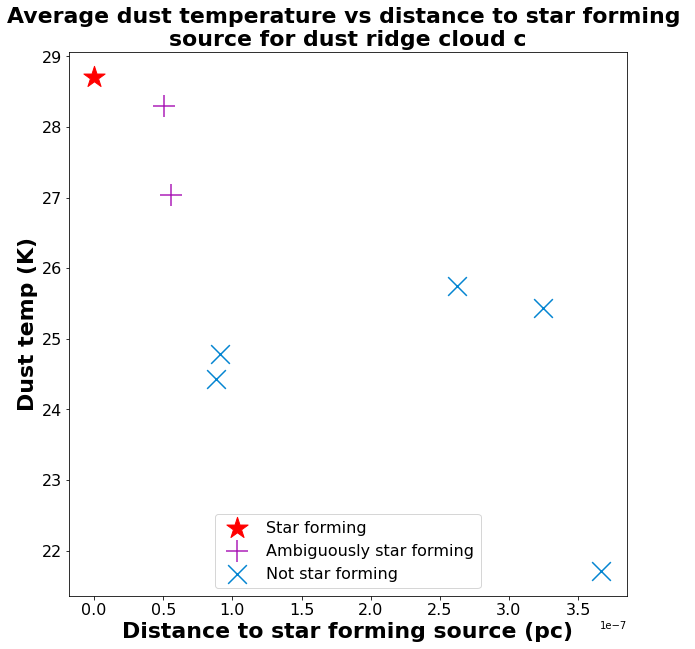

In [64]:
#avg dust temp vs dist dust ridge cloud c
dustridgec_avgdusttemp1 = [avg_Tdust[dustridgec_a]]
dustridgec_avgdusttemp0 = [avg_Tdust[dustridgec_b], avg_Tdust[dustridgec_c], avg_Tdust[dustridgec_d], avg_Tdust[dustridgec_e], avg_Tdust[dustridgec_f]]
dustridgec_avgdusttemp2 = [avg_Tdust[dustridgec_g], avg_Tdust[dustridgec_h]]
                       
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist1, dustridgec_avgdusttemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_dist2, dustridgec_avgdusttemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_dist0, dustridgec_avgdusttemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)


plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
plt.ylabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.title('Average dust temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='lower center')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)


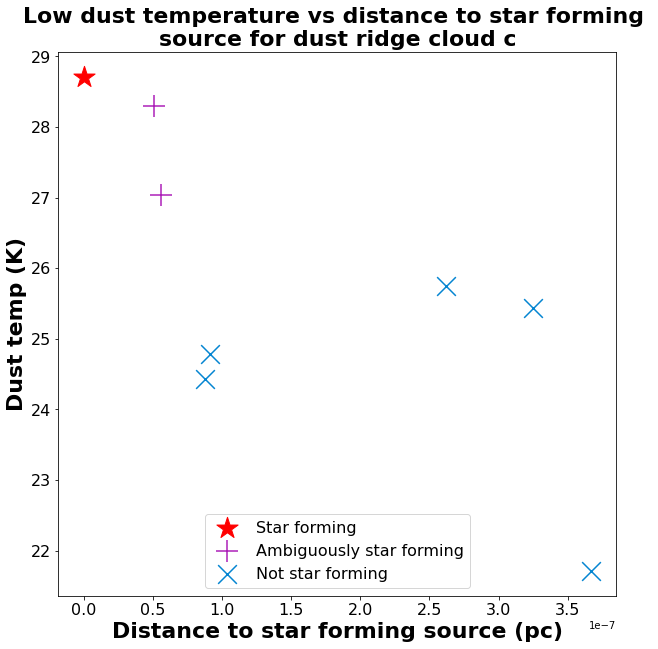

In [65]:
#low dust temp vs dist dust ridge cloud c
dustridgec_lowdusttemp1 = [low_Tdust[dustridgec_a]]
dustridgec_lowdusttemp0 = [low_Tdust[dustridgec_b], low_Tdust[dustridgec_c], low_Tdust[dustridgec_d], low_Tdust[dustridgec_e], low_Tdust[dustridgec_f]]
dustridgec_lowdusttemp2 = [low_Tdust[dustridgec_g], low_Tdust[dustridgec_h]]
                       
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist1, dustridgec_lowdusttemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_dist2, dustridgec_lowdusttemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_dist0, dustridgec_lowdusttemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)


plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
plt.ylabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.title('Low dust temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='lower center')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)


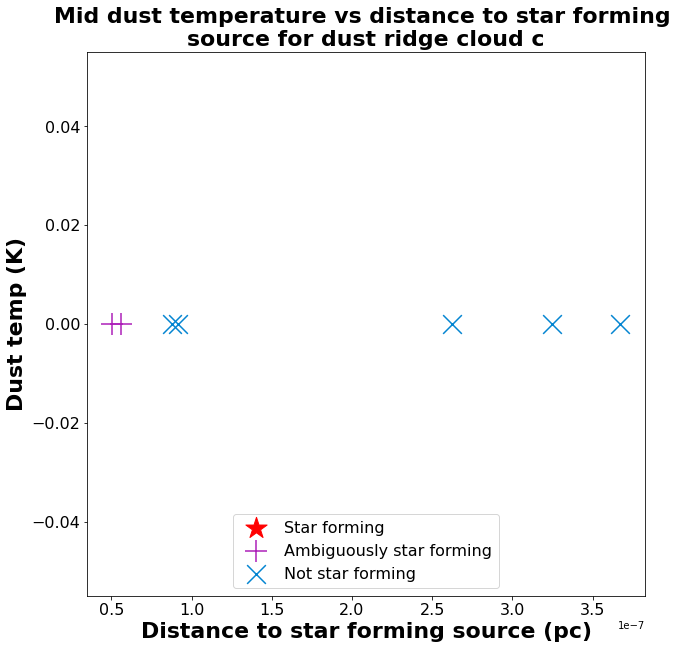

In [66]:
#mid dust temp vs dist dust ridge cloud c
dustridgec_middusttemp1 = [mid_Tdust[dustridgec_a]]
dustridgec_middusttemp0 = [mid_Tdust[dustridgec_b], mid_Tdust[dustridgec_c], mid_Tdust[dustridgec_d], mid_Tdust[dustridgec_e], mid_Tdust[dustridgec_f]]
dustridgec_middusttemp2 = [mid_Tdust[dustridgec_g], mid_Tdust[dustridgec_h]]
                       
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist1, dustridgec_middusttemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_dist2, dustridgec_middusttemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_dist0, dustridgec_middusttemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)


plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
plt.ylabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.title('Mid dust temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='lower center')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)



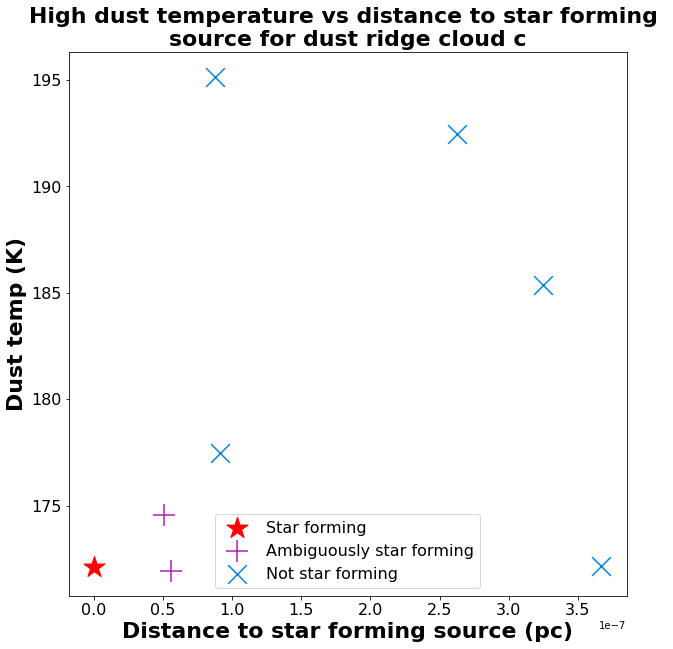

In [67]:
#high dust temp vs dist dust ridge cloud c
dustridgec_highdusttemp1 = [high_Tdust[dustridgec_a]]
dustridgec_highdusttemp0 = [high_Tdust[dustridgec_b], high_Tdust[dustridgec_c], high_Tdust[dustridgec_d], high_Tdust[dustridgec_e], high_Tdust[dustridgec_f]]
dustridgec_highdusttemp2 = [high_Tdust[dustridgec_g], high_Tdust[dustridgec_h]]
                       
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

ax.scatter(dustridgec_dist1, dustridgec_highdusttemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_dist2, dustridgec_highdusttemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_dist0, dustridgec_highdusttemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)


plt.xlabel('Distance to star forming source (pc)', fontsize = 22, weight='bold')
plt.ylabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.title('High dust temperature vs distance to star forming \nsource for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='lower center')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)




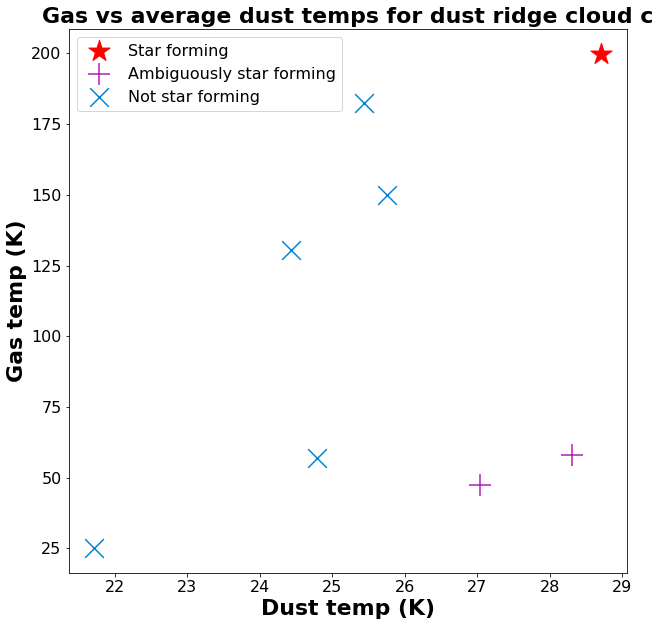

In [68]:
#dust ridge c gas vs dust avg
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.plot([0, 300], [0, 300])
ax.scatter(dustridgec_avgdusttemp1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_avgdusttemp2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_avgdusttemp0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

# plt.xlim(0, 30)
# plt.ylim(0, 250)
plt.xlabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.ylabel('Gas temp (K)', fontsize = 22, weight='bold')
plt.title('Gas vs average dust temps for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='best')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

#not a good correlation between gas and dust, either they're not in thermal equilibrium or formalehyde is only sampling the most thermally excited part 


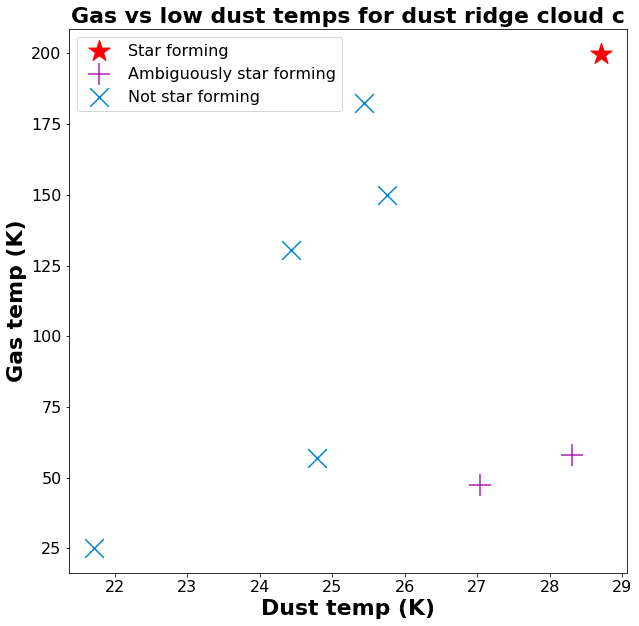

In [69]:
#dust ridge c gas vs low dust T 
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.plot([0, 300], [0, 300])
ax.scatter(dustridgec_lowdusttemp1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_lowdusttemp2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_lowdusttemp0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

# plt.xlim(0, 30)
# plt.ylim(0, 250)
plt.xlabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.ylabel('Gas temp (K)', fontsize = 22, weight='bold')
plt.title('Gas vs low dust temps for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='best')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)


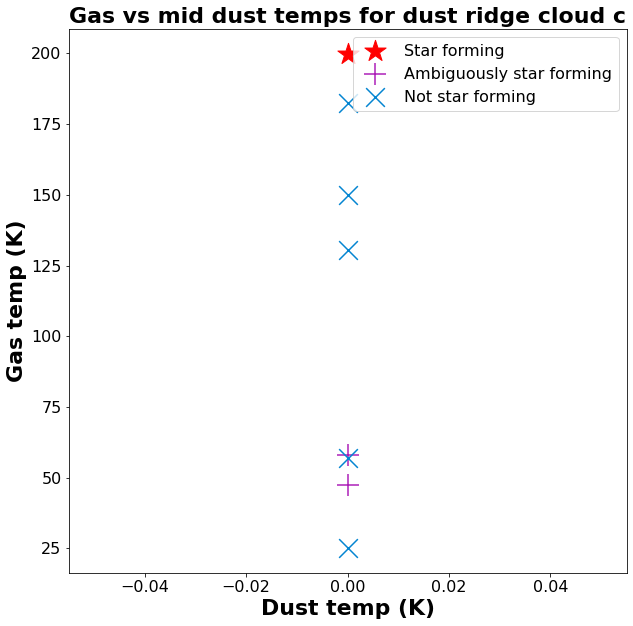

In [70]:
#dust ridge c gas vs mid dust T
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.plot([0, 300], [0, 300])
ax.scatter(dustridgec_middusttemp1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_middusttemp2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_middusttemp0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

# plt.xlim(0, 30)
# plt.ylim(0, 250)
plt.xlabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.ylabel('Gas temp (K)', fontsize = 22, weight='bold')
plt.title('Gas vs mid dust temps for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='best')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)


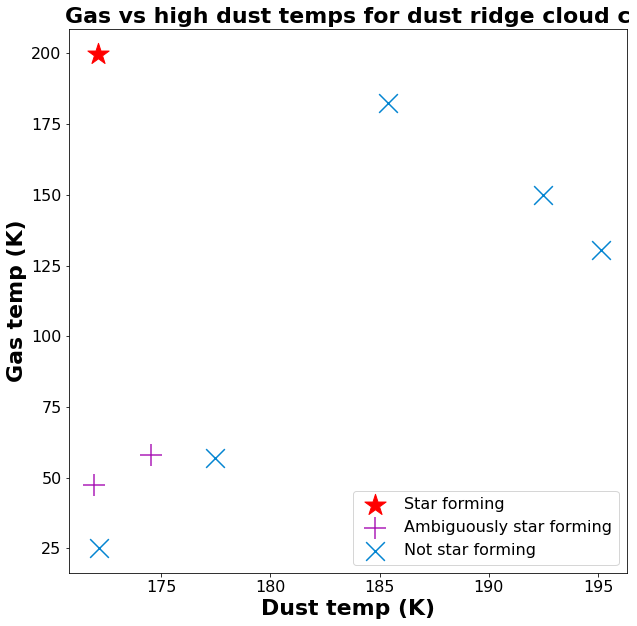

In [71]:
#dust ridge c gas vs high dust T
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

# ax.plot([0, 300], [0, 300])
ax.scatter(dustridgec_highdusttemp1, dustridgec_gastemp1, c='red', marker='*', label='Star forming', s=500)
ax.scatter(dustridgec_highdusttemp2, dustridgec_gastemp2, c='xkcd:barney', marker='+', label='Ambiguously star forming', s=450)
ax.scatter(dustridgec_highdusttemp0, dustridgec_gastemp0, c='xkcd:cerulean', marker='x', label='Not star forming', s=350)

# plt.xlim(0, 30)
# plt.ylim(0, 250)
plt.xlabel('Dust temp (K)', fontsize = 22, weight='bold')
plt.ylabel('Gas temp (K)', fontsize = 22, weight='bold')
plt.title('Gas vs high dust temps for dust ridge cloud c', fontsize = 22, weight='bold')
plt.legend(fontsize=16, loc='best')
ax.tick_params(axis='x',labelsize=16)
ax.tick_params(axis='y',labelsize=16)

#not a good correlation between gas and dust, either they're not in thermal equilibrium or formalehyde is only sampling the most thermally excited part 

